In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
# Display the code being executed
print("# Load the dataset")
print("df = pd.read_csv('1.-2022-23-energy-and-emissions-facilities-and-fleets-en.csv', encoding='UTF-8-SIG')")
print("\
# Display basic information about the dataset")
print("print(df.info())")
print("print(df.head())")
print("print(df.describe())")
print("print(df.isnull().sum())")

# Load the dataset
df = pd.read_csv('1.-2022-23-energy-and-emissions-facilities-and-fleets-en.csv', encoding='UTF-8-SIG')
# Display basic information about the dataset
print(df.info())
print(df.head())
print(df.describe())
print(df.isnull().sum())


In [4]:
# Load the dataset
df = pd.read_csv('../data-collection/1.-2022-23-energy-and-emissions-facilities-and-fleets-en.csv', encoding='UTF-8-SIG')

In [5]:
# Display basic information about the dataset
print(df.info())
print(df.head())
print(df.describe())
print(df.isnull().sum())

print("\
# Encode categorical variables")
print("df_encoded = pd.get_dummies(df, columns=['Federal organization', 'Fiscal year', 'GHG source', 'Energy category'])")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Federal organization  2075 non-null   object 
 1   Fiscal year           2075 non-null   object 
 2   GHG source            2075 non-null   object 
 3   GHG scope             2075 non-null   int64  
 4   Energy category       2075 non-null   object 
 5   Energy use (GJ)       2075 non-null   float64
 6   Emissions (kt)        2075 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 113.6+ KB
None
               Federal organization Fiscal year  GHG source  GHG scope   
0  Agriculture and Agri-Food Canada     2005-06  facilities          1  \
1  Agriculture and Agri-Food Canada     2005-06       fleet          1   
2  Agriculture and Agri-Food Canada     2005-06  facilities          2   
3  Agriculture and Agri-Food Canada     2005-06  facilities          2

In [6]:
# Encode categorical variables
df_encoded = pd.get_dummies(df, columns=['Federal organization', 'Fiscal year', 'GHG source', 'Energy category'])

print("\
# Normalize numerical features")
print("scaler = StandardScaler()")
print("df_encoded[['Energy use (GJ)', 'Emissions (kt)']] = scaler.fit_transform(df_encoded[['Energy use (GJ)', 'Emissions (kt)']])")

# Normalize numerical features
scaler = StandardScaler()
df_encoded[['Energy use (GJ)', 'Emissions (kt)']] = scaler.fit_transform(df_encoded[['Energy use (GJ)', 'Emissions (kt)']])


In [16]:
# Normalize numerical features
scaler = StandardScaler()
df_encoded[['Energy use (GJ)', 'Emissions (kt)']] = scaler.fit_transform(df_encoded[['Energy use (GJ)', 'Emissions (kt)']])




# Check for outliers using IQR method


In [17]:
print("\
# Check for outliers using IQR method")

# Check for outliers using IQR method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

print("\
outliers_energy = detect_outliers(df, 'Energy use (GJ)')")
print("outliers_emissions = detect_outliers(df, 'Emissions (kt)')")
print("print(f'Number of outliers in Energy use (GJ): {len(outliers_energy)}')")
print("print(f'Number of outliers in Emissions (kt): {len(outliers_emissions)}')")

outliers_energy = detect_outliers(df, 'Energy use (GJ)')
outliers_emissions = detect_outliers(df, 'Emissions (kt)')
print(f'Number of outliers in Energy use (GJ): {len(outliers_energy)}')
print(f'Number of outliers in Emissions (kt): {len(outliers_emissions)}')


# Check for outliers using IQR method
outliers_energy = detect_outliers(df, 'Energy use (GJ)')
outliers_emissions = detect_outliers(df, 'Emissions (kt)')
print(f'Number of outliers in Energy use (GJ): {len(outliers_energy)}')
print(f'Number of outliers in Emissions (kt): {len(outliers_emissions)}')
Number of outliers in Energy use (GJ): 279
Number of outliers in Emissions (kt): 273


# Correlation analysis
# Plot correlation heatmap


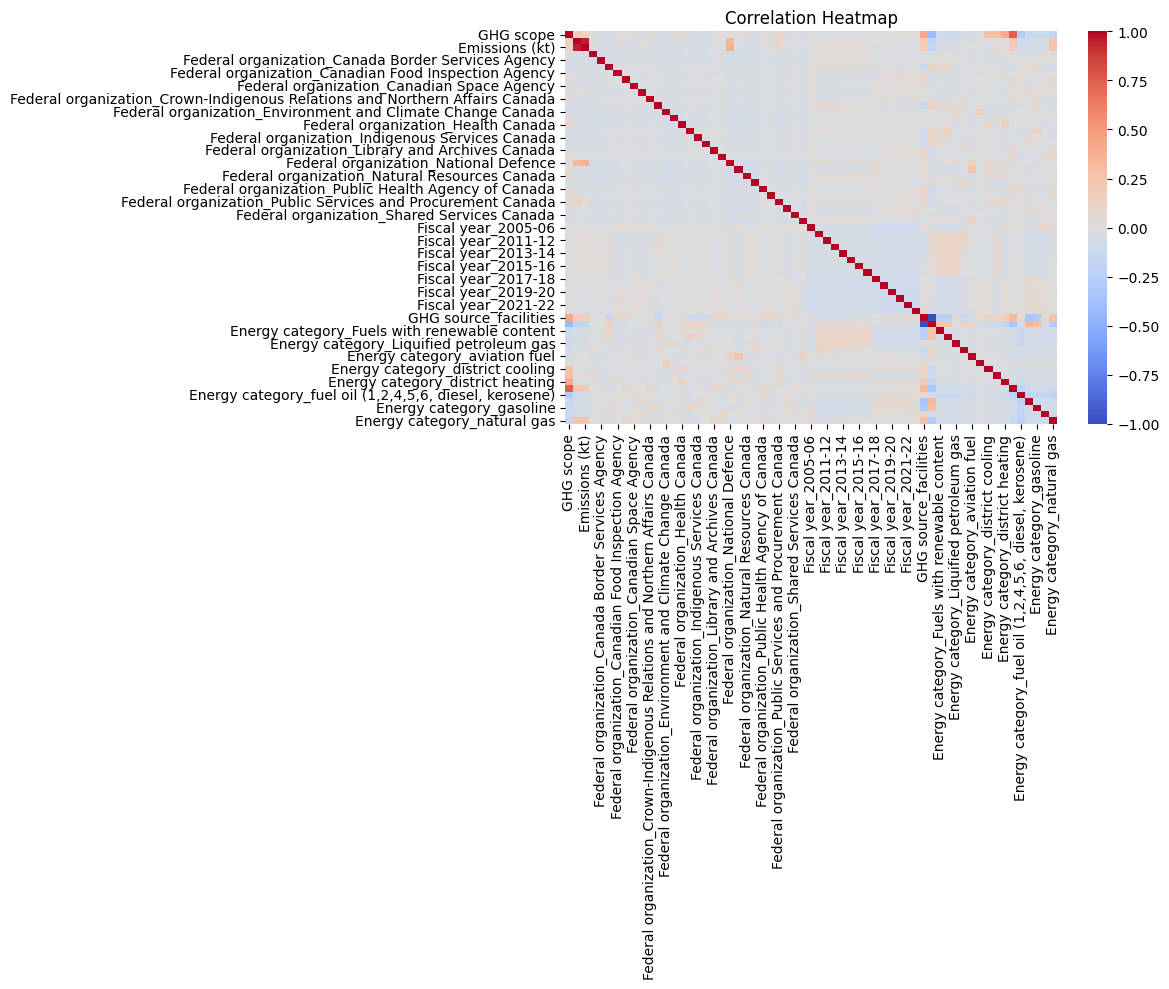

In [12]:
print("\
# Correlation analysis")

# Correlation analysis
corr_matrix = df_encoded.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()
print("plt.savefig('correlation_heatmap.png')")
print("plt.close()")

# Distribution plots


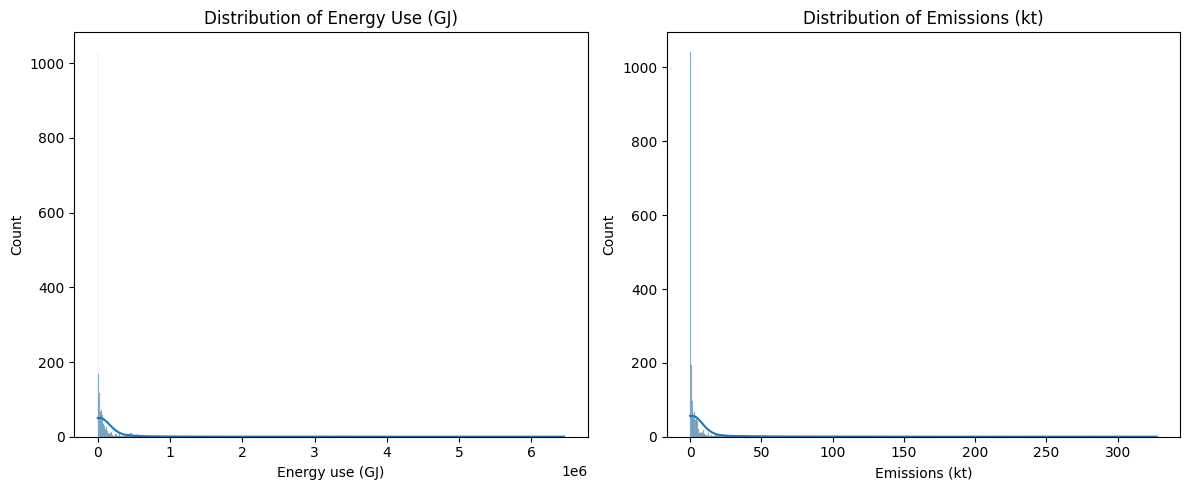

In [15]:
print("\
# Distribution plots")


# Distribution plots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Energy use (GJ)'], kde=True)
plt.title('Distribution of Energy Use (GJ)')
plt.subplot(1, 2, 2)
sns.histplot(df['Emissions (kt)'], kde=True)
plt.title('Distribution of Emissions (kt)')
plt.tight_layout()
plt.show()
plt.savefig('distribution_plots.png')
plt.close()
